In [38]:
import gp, gp.data
import pandas as pd
from glob import glob
import re
import os
import time
import wget
import getpass
from io import StringIO
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv('/home/jovyan/df_raw.gct', header=2,sep='\t').drop('Description',axis=1)
df_fpkm = pd.read_csv('/home/jovyan/df_fpkm.gct', header=2,sep='\t').drop('Description',axis=1)
names_raw = df_raw.drop('NAME',axis=1).columns
names_fpkm = df_fpkm.drop('NAME',axis=1).columns

#display(df_raw)


#this will print the name of the drugs, their socres, and their rankings for each individual patient
#more columns will be appended to the dataframe 
df_raw_namerank = pd.DataFrame()
counter = 0 
for name in names_raw:
    df_raw["RANKING: " +name] = df_raw[name].rank(method = 'min', ascending = False)
    df_raw_sub = df_raw[['NAME', name ,"RANKING: " +name]]
    df_raw_sub.sort_values("RANKING: " +name, inplace = True)
    df_raw_sub = df_raw_sub.reset_index(drop=True)
    #df_raw_sub.set_index("RANKING: " +name, inplace = True)
    if counter == 0:
        df_raw_namerank[name] = df_raw_sub['NAME']
    else:
        df_raw_namerank[name] = df_raw_sub['NAME']
        pass
#    df_raw_sub.set_index("RANKING: " +name, inplace = True)
#    df_raw_namerank.set_index("Ranking", inplace=True)
    counter =+1
df_raw_namerank = df_raw_namerank.reset_index()
df_raw_namerank.rename(columns={'index': 'Ranking'}, inplace=True)
df_raw_namerank['Ranking'] = df_raw_namerank.index + 1
display(df_raw_namerank.head())


    
    
#    if counter == 0:
#        df_raw_namerank['Ranking'] = df_raw["RANKING: " +name]
        #df_raw_namerank.set_index("Ranking", inplace=True)
#        df_raw_namerank.rename(columns = {"RANKING: " +name :'Ranking'}, inplace = True)
#    else:
#        df_raw_namerank[name] = df_raw_sub['NAME']
        #print(df_raw_sub['NAME'])
        #pass
#    counter += 1

        
    
 
#this will create a dataframe with every drug's ranking for every patient
#this will also add a column with the average of every drug's ranking across patients
#and a column with the standard deviation across patient rankings
df_rankings = pd.DataFrame(df_raw['NAME'])    
names_raw_update = df_raw.drop('NAME',axis=1).columns

for name in names_raw_update:
    if "RANKING: " in name:
        df_rankings[name] = df_raw[name]
    else:
        pass
df_rankings['RankingAvg'] = df_rankings.iloc[:,1:21].mean(axis=1)
df_rankings['RankingSTD'] = df_rankings.iloc[:,1:21].std(axis=1)
#df_rankings

#this will create a dataframe with every drug's score for every patient
#this will also add a column with the average of every drug's score across patients
#and a column with the standard deviation across patient scores
df_raw_og = pd.DataFrame(df_raw['NAME'])    
names_raw_update2 = df_raw.drop('NAME',axis=1).columns

for name in names_raw_update2:
    if "RANKING: " in name:
        pass
    else:
        df_raw_og[name] = df_raw[name]
df_raw_og['ScoreAvg'] = df_raw_og.iloc[:,1:21].mean(axis=1)
df_raw_og['ScoreSTD'] = df_raw_og.iloc[:,1:21].std(axis=1)
#df_raw_og


#output_name = "revisor2"
#gp.data.write_gct(df_rankings, file_path='./'+output_name+'.gct')
#print("DataFrame Successfully Created! Please look for " +output_name+ " in your home directory")

#print a dataframe with only the name and the ranking columns
#for name in names_raw:
    #df_raw_ranking = df_raw[['NAME',"RANKING: " +name]]
    
#df_raw_ranking


    #if counter == 0:
     #   df_raw_ranks = df_raw['NAME']
      #  df_raw_ranks["RANKING: " +name] = df_raw["RANKING: " +name]
       # counter += 1
    #else:
     #   print("ok")
     #   counter += 1
    
#df_raw_ranks[['']]
    
    
    
#this will display the score of each drug for every patient:
#df_raw

#this will display the ranking of each drug for every patient:
#df_raw = df_raw.iloc[:,1:21].rank(method = 'min', ascending = False)
#df_raw

#df_raw_patrank = df_raw.iloc[:,1:21].rank(method = 'min', ascending = False)
#df_raw_patrank.index = df_raw['NAME']
#df_raw_patrank

#for name in names_raw:
    #df_raw_reconfig = df_raw_patrank[['NAME',name]]
    #df_raw_reconfig.sort_values([name], axis=0, 
                 #ascending=True, inplace=True)
    #display(df_raw_reconfig)

/opt/conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Ranking,A7-A0CE-01_DiSC,A7-A0CH-01_DiSC,A7-A0D9-01_DiSC,A7-A0DB-01_DiSC,A7-A13E-01_DiSC,A7-A13F-01_DiSC,A7-A13G-01_DiSC,AC-A23H-01_DiSC,AC-A2FB-01_DiSC,...,AC-A2FM-01_DiSC,BH-A0AU-01_DiSC,BH-A0AY-01_DiSC,BH-A0AZ-01_DiSC,BH-A0B3-01_DiSC,BH-A0B5-01_DiSC,BH-A0B7-01_DiSC,BH-A0B8-01_DiSC,BH-A0BA-01_DiSC,BH-A0BC-01_DiSC
0,1,gdsc_Cetuximab,gdsc_Cetuximab,gdsc_Afatinib,gdsc_Afatinib,gdsc_Afatinib,gdsc_Afatinib,gdsc_Afatinib,gdsc_Afatinib,gdsc_Ruxolitinib,...,gdsc_Alectinib,gdsc_Afatinib,gdsc_Ruxolitinib,gdsc_Linifanib,gdsc_Motesanib,gdsc_Afatinib,gdsc_Ruxolitinib,gdsc_Alectinib,gdsc_Alectinib,gdsc_Alectinib
1,2,gdsc_Motesanib,gdsc_GW-2580,gdsc_Cetuximab,gdsc_Cetuximab,gdsc_Cetuximab,gdsc_Motesanib,gdsc_Cetuximab,gdsc_Cetuximab,gdsc_Alectinib,...,gdsc_Linsitinib,gdsc_rTRAIL,gdsc_Linifanib,gdsc_Ruxolitinib,gdsc_Cetuximab,gdsc_Cetuximab,gdsc_Afatinib,gdsc_Navitoclax,gdsc_Ruxolitinib,gdsc_Quizartinib
2,3,gdsc_GW441756,gdsc_Afatinib,gdsc_GW441756,gdsc_GW-2580,gdsc_GW441756,gdsc_GW441756,gdsc_GW441756,gdsc_Gefitinib,gdsc_VNLG/124,...,gdsc_TL-2-105,gdsc_Cetuximab,gdsc_Alectinib,gdsc_Quizartinib,gdsc_GW441756,gdsc_GW441756,gdsc_Alectinib,gdsc_Linsitinib,gdsc_Afatinib,gdsc_VNLG/124
3,4,gdsc_Afatinib,gdsc_GW441756,gdsc_WZ-1-84,gdsc_GW441756,gdsc_Motesanib,gdsc_Cetuximab,gdsc_GW-2580,gdsc_WZ-1-84,gdsc_Afatinib,...,gdsc_GW-2580,gdsc_Gefitinib,gdsc_Motesanib,gdsc_Motesanib,gdsc_Afatinib,gdsc_Gefitinib,gdsc_Cetuximab,gdsc_TL-2-105,gdsc_GW441756,gdsc_GW-2580
4,5,gdsc_rTRAIL,ctrp_PD 153035,gdsc_GW-2580,gdsc_Gefitinib,gdsc_WZ-1-84,gdsc_Gefitinib,gdsc_Gefitinib,gdsc_Motesanib,gdsc_Quizartinib,...,gdsc_Navitoclax,gdsc_Motesanib,gdsc_Quizartinib,gdsc_PD173074,gdsc_PD173074,gdsc_GW-2580,gdsc_TL-2-105,gdsc_SB52334,gdsc_Cetuximab,gdsc_Linsitinib


In [31]:
display(df_raw_og)

,NAME,A7-A0CE-01_DiSC,A7-A0CH-01_DiSC,A7-A0D9-01_DiSC,A7-A0DB-01_DiSC,A7-A13E-01_DiSC,A7-A13F-01_DiSC,A7-A13G-01_DiSC,AC-A23H-01_DiSC,AC-A2FB-01_DiSC,...,BH-A0AY-01_DiSC,BH-A0AZ-01_DiSC,BH-A0B3-01_DiSC,BH-A0B5-01_DiSC,BH-A0B7-01_DiSC,BH-A0B8-01_DiSC,BH-A0BA-01_DiSC,BH-A0BC-01_DiSC,ScoreAvg,ScoreSTD
0,ccle_17-AAG,-0.172,-0.176,-0.200,-0.210,-0.158,-0.201,-0.185,0.167,-0.178,...,0.199,-0.190,-0.223,0.179,0.189,-0.210,0.222,0.185,-0.03435,0.199811
1,ccle_AEW541,-0.298,-0.269,-0.284,-0.282,-0.263,-0.278,-0.283,-0.272,0.205,...,-0.236,-0.213,-0.228,-0.261,-0.198,-0.246,-0.238,-0.228,-0.20565,0.151834
2,ccle_AZD0530,-0.232,0.244,0.300,0.353,0.309,0.264,0.315,0.311,0.224,...,-0.250,-0.227,-0.195,0.328,-0.176,-0.270,-0.243,-0.196,0.00910,0.266826
3,ccle_AZD6244,0.266,-0.257,-0.310,-0.355,-0.264,-0.317,-0.320,-0.305,-0.316,...,-0.268,-0.256,-0.275,-0.334,-0.302,-0.356,0.331,0.297,-0.18060,0.254631
4,ccle_Erlotinib,0.294,0.345,0.449,0.415,0.435,0.382,0.412,0.411,0.266,...,-0.289,-0.334,0.275,0.423,0.258,-0.319,0.319,0.290,0.15815,0.314697
5,ccle_Irinotecan,-0.493,-0.473,-0.469,-0.502,-0.476,-0.500,-0.512,-0.405,0.232,...,-0.189,-0.396,-0.358,-0.356,-0.254,-0.280,-0.309,-0.346,-0.35045,0.171078
6,ccle_L-685458,-0.414,-0.405,-0.419,-0.412,-0.421,-0.418,-0.431,-0.358,0.208,...,-0.226,-0.323,-0.305,-0.309,-0.229,-0.302,-0.239,-0.307,-0.30825,0.140800
7,ccle_LBW242,0.308,-0.293,-0.304,-0.334,-0.287,-0.303,-0.292,-0.299,0.295,...,0.288,0.302,0.329,-0.345,0.306,-0.340,-0.346,-0.320,-0.09945,0.306395
8,ccle_Lapatinib,0.253,0.361,0.509,0.462,0.455,0.468,0.465,0.490,0.356,...,0.278,-0.236,0.302,0.523,0.341,0.344,0.433,0.347,0.35400,0.162388
9,ccle_Nilotinib,-0.392,-0.420,-0.386,-0.424,-0.395,-0.385,-0.427,-0.356,0.312,...,0.319,-0.300,-0.304,-0.406,-0.291,-0.345,-0.274,-0.319,-0.28795,0.211809


In [32]:
display(df_rankings)

,NAME,RANKING: A7-A0CE-01_DiSC,RANKING: A7-A0CH-01_DiSC,RANKING: A7-A0D9-01_DiSC,RANKING: A7-A0DB-01_DiSC,RANKING: A7-A13E-01_DiSC,RANKING: A7-A13F-01_DiSC,RANKING: A7-A13G-01_DiSC,RANKING: AC-A23H-01_DiSC,RANKING: AC-A2FB-01_DiSC,...,RANKING: BH-A0AY-01_DiSC,RANKING: BH-A0AZ-01_DiSC,RANKING: BH-A0B3-01_DiSC,RANKING: BH-A0B5-01_DiSC,RANKING: BH-A0B7-01_DiSC,RANKING: BH-A0B8-01_DiSC,RANKING: BH-A0BA-01_DiSC,RANKING: BH-A0BC-01_DiSC,RankingAvg,RankingSTD
0,ccle_17-AAG,235.0,186.0,174.0,191.0,196.0,161.0,183.0,186.0,507.0,...,218.0,269.0,356.0,196.0,250.0,306.0,218.0,246.0,240.25,79.448676
1,ccle_AEW541,434.0,322.0,273.0,287.0,322.0,278.0,269.0,352.0,456.0,...,450.0,337.0,367.0,251.0,320.0,371.0,325.0,386.0,343.30,63.632249
2,ccle_AZD0530,266.0,157.0,136.0,81.0,81.0,136.0,122.0,92.0,422.0,...,501.0,380.0,283.0,104.0,289.0,421.0,343.0,295.0,259.40,143.737114
3,ccle_AZD6244,177.0,293.0,350.0,512.0,328.0,395.0,367.0,452.0,679.0,...,557.0,488.0,541.0,465.0,615.0,597.0,92.0,116.0,412.00,181.685385
4,ccle_Erlotinib,137.0,64.0,37.0,31.0,27.0,42.0,40.0,38.0,291.0,...,620.0,675.0,127.0,41.0,169.0,543.0,108.0,130.0,233.00,235.899176
5,ccle_Irinotecan,717.0,722.0,685.0,722.0,722.0,719.0,712.0,686.0,392.0,...,315.0,725.0,692.0,528.0,501.0,440.0,559.0,679.0,605.65,143.706673
6,ccle_L-685458,660.0,669.0,609.0,632.0,681.0,654.0,632.0,603.0,452.0,...,411.0,659.0,613.0,381.0,409.0,499.0,330.0,621.0,555.75,113.571621
7,ccle_LBW242,122.0,394.0,323.0,442.0,401.0,349.0,293.0,428.0,212.0,...,106.0,85.0,64.0,493.0,96.0,578.0,644.0,642.0,348.80,212.633760
8,ccle_Lapatinib,193.0,48.0,21.0,15.0,23.0,16.0,21.0,18.0,85.0,...,119.0,423.0,95.0,18.0,55.0,78.0,19.0,62.0,80.50,93.396439
9,ccle_Nilotinib,642.0,691.0,555.0,652.0,652.0,592.0,626.0,600.0,176.0,...,69.0,619.0,609.0,625.0,592.0,584.0,443.0,640.0,560.00,158.769611


In [33]:
temp = df_rankings
temp = temp.set_index('NAME')
temp['Average'] = temp.mean(axis=1)
temp.head()
temp.loc['gdsc_Afatinib','Average']

194.84491129519182

In [34]:
temp.loc['gdsc_Cetuximab','Average']

268.5713611708654

In [36]:
temp.loc['gdsc_Cetuximab']

RANKING: A7-A0CE-01_DiSC      1.000000
RANKING: A7-A0CH-01_DiSC      1.000000
RANKING: A7-A0D9-01_DiSC      2.000000
RANKING: A7-A0DB-01_DiSC      2.000000
RANKING: A7-A13E-01_DiSC      2.000000
RANKING: A7-A13F-01_DiSC      4.000000
RANKING: A7-A13G-01_DiSC      2.000000
RANKING: AC-A23H-01_DiSC      2.000000
RANKING: AC-A2FB-01_DiSC    754.000000
RANKING: AC-A2FF-01_DiSC    752.000000
RANKING: AC-A2FM-01_DiSC    748.000000
RANKING: BH-A0AU-01_DiSC      3.000000
RANKING: BH-A0AY-01_DiSC    752.000000
RANKING: BH-A0AZ-01_DiSC    751.000000
RANKING: BH-A0B3-01_DiSC      2.000000
RANKING: BH-A0B5-01_DiSC      2.000000
RANKING: BH-A0B7-01_DiSC      4.000000
RANKING: BH-A0B8-01_DiSC    738.000000
RANKING: BH-A0BA-01_DiSC      5.000000
RANKING: BH-A0BC-01_DiSC    752.000000
RankingAvg                  263.950000
RankingSTD                  365.619946
Average                     268.571361
Name: gdsc_Cetuximab, dtype: float64

In [7]:
temp.loc['gdsc_Afatinib']

RANKING: A7-A0CE-01_DiSC      4.000000
RANKING: A7-A0CH-01_DiSC      3.000000
RANKING: A7-A0D9-01_DiSC      1.000000
RANKING: A7-A0DB-01_DiSC      1.000000
RANKING: A7-A13E-01_DiSC      1.000000
RANKING: A7-A13F-01_DiSC      1.000000
RANKING: A7-A13G-01_DiSC      1.000000
RANKING: AC-A23H-01_DiSC      1.000000
RANKING: AC-A2FB-01_DiSC      4.000000
RANKING: AC-A2FF-01_DiSC    748.000000
RANKING: AC-A2FM-01_DiSC    743.000000
RANKING: BH-A0AU-01_DiSC      1.000000
RANKING: BH-A0AY-01_DiSC     11.000000
RANKING: BH-A0AZ-01_DiSC    746.000000
RANKING: BH-A0B3-01_DiSC      4.000000
RANKING: BH-A0B5-01_DiSC      1.000000
RANKING: BH-A0B7-01_DiSC      2.000000
RANKING: BH-A0B8-01_DiSC    741.000000
RANKING: BH-A0BA-01_DiSC      3.000000
RANKING: BH-A0BC-01_DiSC    751.000000
RankingAvg                  188.400000
RankingSTD                  330.188048
Average                     194.844911
Name: gdsc_Afatinib, dtype: float64

In [8]:
df_fpkm_ranks = pd.DataFrame()
counter = 0 
for name in names_fpkm:
    df_fpkm["RANKING: " +name] = df_fpkm[name].rank(method = 'min', ascending = False)
    df_fpkm_sub = df_fpkm[['NAME', name ,"RANKING: " +name]]
    df_fpkm_sub.sort_values("RANKING: " +name, inplace = True)
    display(df_fpkm_sub)
    
 
#this will create a dataframe with every drug's ranking for every patient
#this will also add a column with the average of every drug's ranking across patients
#and a column with the standard deviation across patient rankings
df_FPrankings = pd.DataFrame(df_fpkm['NAME'])    
names_fpkm_update = df_fpkm.drop('NAME',axis=1).columns

for name in names_fpkm_update:
    if "RANKING: " in name:
        df_FPrankings[name] = df_fpkm[name]
    else:
        pass
df_FPrankings['RankingAvg'] = df_FPrankings.iloc[:,1:21].mean(axis=1)
df_FPrankings['RankingSTD'] = df_FPrankings.iloc[:,1:21].std(axis=1)
#df_FPrankings

#this will create a dataframe with every drug's score for every patient
#this will also add a column with the average of every drug's score across patients
#and a column with the standard deviation across patient scores
df_fpkm_og = pd.DataFrame(df_fpkm['NAME'])    
names_fpkm_update2 = df_fpkm.drop('NAME',axis=1).columns

for name in names_fpkm_update2:
    if "RANKING: " in name:
        pass
    else:
        df_fpkm_og[name] = df_fpkm[name]
df_fpkm_og['ScoreAvg'] = df_fpkm_og.iloc[:,1:21].mean(axis=1)
df_fpkm_og['ScoreSTD'] = df_fpkm_og.iloc[:,1:21].std(axis=1)
#df_fpkm_og


/opt/conda/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NAME,A7-A0CE-01_DiSC,RANKING: A7-A0CE-01_DiSC
521,gdsc_Alectinib,0.617,1.0
592,gdsc_GW441756,0.582,2.0
556,gdsc_Cetuximab,0.560,3.0
754,gdsc_rTRAIL,0.540,4.0
659,gdsc_PLX-4720,0.522,5.0
562,gdsc_Dabrafenib,0.518,6.0
365,ctrp_dabrafenib,0.505,7.0
623,gdsc_Linsitinib,0.501,8.0
520,gdsc_Afatinib,0.481,9.0
601,gdsc_IOX2,0.450,10.0


,NAME,A7-A0CH-01_DiSC,RANKING: A7-A0CH-01_DiSC
632,gdsc_Motesanib,0.592,1.0
651,gdsc_PD173074,0.551,2.0
722,gdsc_Tretinoin,0.550,3.0
727,gdsc_VX-11e,0.550,3.0
588,gdsc_GSK429286A,0.540,5.0
562,gdsc_Dabrafenib,0.525,6.0
524,gdsc_Axitinib,0.517,7.0
558,gdsc_Crizotinib,0.500,8.0
535,gdsc_Bexarotene,0.490,9.0
642,gdsc_Nutlin-3a (-),0.486,10.0


,NAME,A7-A0D9-01_DiSC,RANKING: A7-A0D9-01_DiSC
520,gdsc_Afatinib,0.702,1.0
556,gdsc_Cetuximab,0.628,2.0
592,gdsc_GW441756,0.596,3.0
594,gdsc_Gefitinib,0.575,4.0
551,gdsc_CP724714,0.563,5.0
623,gdsc_Linsitinib,0.554,6.0
591,gdsc_GW-2580,0.547,7.0
254,ctrp_PD 153035,0.530,8.0
737,gdsc_WZ-1-84,0.528,9.0
393,ctrp_ibrutinib,0.494,10.0


,NAME,A7-A0DB-01_DiSC,RANKING: A7-A0DB-01_DiSC
521,gdsc_Alectinib,0.602,1.0
556,gdsc_Cetuximab,0.588,2.0
520,gdsc_Afatinib,0.581,3.0
551,gdsc_CP724714,0.501,4.0
640,gdsc_Navitoclax,0.472,5.0
66,ctrp_BRD-K09344309,0.456,6.0
471,ctrp_sotrastaurin,0.450,7.0
407,ctrp_linsitinib,0.443,8.0
591,gdsc_GW-2580,0.435,9.0
594,gdsc_Gefitinib,0.432,10.0


,NAME,A7-A13E-01_DiSC,RANKING: A7-A13E-01_DiSC
682,gdsc_Ruxolitinib,0.673,1.0
622,gdsc_Linifanib,0.623,2.0
591,gdsc_GW-2580,0.619,3.0
726,gdsc_VNLG/124,0.613,4.0
521,gdsc_Alectinib,0.587,5.0
558,gdsc_Crizotinib,0.536,6.0
556,gdsc_Cetuximab,0.533,7.0
709,gdsc_TL-2-105,0.533,7.0
603,gdsc_Idelalisib,0.528,9.0
677,gdsc_Quizartinib,0.518,10.0


,NAME,A7-A13F-01_DiSC,RANKING: A7-A13F-01_DiSC
520,gdsc_Afatinib,0.569,1.0
754,gdsc_rTRAIL,0.529,2.0
556,gdsc_Cetuximab,0.499,3.0
250,ctrp_O-6-benzylguanine,0.499,3.0
551,gdsc_CP724714,0.461,5.0
728,gdsc_VX-702,0.440,6.0
92,ctrp_BRD-K42260513,0.439,7.0
254,ctrp_PD 153035,0.429,8.0
259,ctrp_PF-4800567 hydrochloride,0.429,8.0
686,gdsc_SB52334,0.422,10.0


,NAME,A7-A13G-01_DiSC,RANKING: A7-A13G-01_DiSC
592,gdsc_GW441756,0.625,1.0
682,gdsc_Ruxolitinib,0.577,2.0
521,gdsc_Alectinib,0.557,3.0
520,gdsc_Afatinib,0.531,4.0
556,gdsc_Cetuximab,0.529,5.0
594,gdsc_Gefitinib,0.467,6.0
640,gdsc_Navitoclax,0.465,7.0
591,gdsc_GW-2580,0.448,8.0
601,gdsc_IOX2,0.446,9.0
723,gdsc_Tubastatin A,0.437,10.0


,NAME,AC-A23H-01_DiSC,RANKING: AC-A23H-01_DiSC
622,gdsc_Linifanib,0.621,1.0
726,gdsc_VNLG/124,0.607,2.0
520,gdsc_Afatinib,0.569,3.0
722,gdsc_Tretinoin,0.554,4.0
254,ctrp_PD 153035,0.534,5.0
521,gdsc_Alectinib,0.525,6.0
393,ctrp_ibrutinib,0.513,7.0
556,gdsc_Cetuximab,0.510,8.0
551,gdsc_CP724714,0.508,9.0
677,gdsc_Quizartinib,0.506,10.0


,NAME,AC-A2FB-01_DiSC,RANKING: AC-A2FB-01_DiSC
682,gdsc_Ruxolitinib,0.687,1.0
521,gdsc_Alectinib,0.674,2.0
726,gdsc_VNLG/124,0.655,3.0
520,gdsc_Afatinib,0.575,4.0
677,gdsc_Quizartinib,0.566,5.0
592,gdsc_GW441756,0.560,6.0
722,gdsc_Tretinoin,0.553,7.0
709,gdsc_TL-2-105,0.516,8.0
614,gdsc_KIN001-260,0.516,8.0
703,gdsc_T0901317,0.512,10.0


,NAME,AC-A2FF-01_DiSC,RANKING: AC-A2FF-01_DiSC
632,gdsc_Motesanib,0.587,1.0
623,gdsc_Linsitinib,0.557,2.0
588,gdsc_GSK429286A,0.507,3.0
677,gdsc_Quizartinib,0.504,4.0
592,gdsc_GW441756,0.491,5.0
407,ctrp_linsitinib,0.472,6.0
524,gdsc_Axitinib,0.470,7.0
471,ctrp_sotrastaurin,0.464,8.0
719,gdsc_Tivozanib,0.463,9.0
651,gdsc_PD173074,0.463,9.0


,NAME,AC-A2FM-01_DiSC,RANKING: AC-A2FM-01_DiSC
521,gdsc_Alectinib,0.592,1.0
623,gdsc_Linsitinib,0.557,2.0
709,gdsc_TL-2-105,0.555,3.0
591,gdsc_GW-2580,0.552,4.0
640,gdsc_Navitoclax,0.546,5.0
584,gdsc_GSK1070916,0.525,6.0
723,gdsc_Tubastatin A,0.510,7.0
686,gdsc_SB52334,0.506,8.0
728,gdsc_VX-702,0.456,9.0
407,ctrp_linsitinib,0.454,10.0


,NAME,BH-A0AU-01_DiSC,RANKING: BH-A0AU-01_DiSC
520,gdsc_Afatinib,0.561,1.0
754,gdsc_rTRAIL,0.526,2.0
556,gdsc_Cetuximab,0.484,3.0
594,gdsc_Gefitinib,0.477,4.0
632,gdsc_Motesanib,0.475,5.0
623,gdsc_Linsitinib,0.453,6.0
728,gdsc_VX-702,0.442,7.0
254,ctrp_PD 153035,0.421,8.0
92,ctrp_BRD-K42260513,0.413,9.0
601,gdsc_IOX2,0.407,10.0


,NAME,BH-A0AY-01_DiSC,RANKING: BH-A0AY-01_DiSC
682,gdsc_Ruxolitinib,0.623,1.0
622,gdsc_Linifanib,0.616,2.0
521,gdsc_Alectinib,0.562,3.0
632,gdsc_Motesanib,0.533,4.0
677,gdsc_Quizartinib,0.530,5.0
592,gdsc_GW441756,0.517,6.0
594,gdsc_Gefitinib,0.517,6.0
722,gdsc_Tretinoin,0.510,8.0
709,gdsc_TL-2-105,0.503,9.0
623,gdsc_Linsitinib,0.498,10.0


,NAME,BH-A0AZ-01_DiSC,RANKING: BH-A0AZ-01_DiSC
622,gdsc_Linifanib,0.662,1.0
682,gdsc_Ruxolitinib,0.636,2.0
677,gdsc_Quizartinib,0.557,3.0
632,gdsc_Motesanib,0.549,4.0
651,gdsc_PD173074,0.544,5.0
726,gdsc_VNLG/124,0.516,6.0
727,gdsc_VX-11e,0.505,7.0
623,gdsc_Linsitinib,0.481,8.0
655,gdsc_PHA-665752,0.479,9.0
642,gdsc_Nutlin-3a (-),0.469,10.0


,NAME,BH-A0B3-01_DiSC,RANKING: BH-A0B3-01_DiSC
632,gdsc_Motesanib,0.613,1.0
556,gdsc_Cetuximab,0.586,2.0
592,gdsc_GW441756,0.546,3.0
520,gdsc_Afatinib,0.528,4.0
651,gdsc_PD173074,0.517,5.0
754,gdsc_rTRAIL,0.490,6.0
601,gdsc_IOX2,0.488,7.0
594,gdsc_Gefitinib,0.474,8.0
737,gdsc_WZ-1-84,0.469,9.0
524,gdsc_Axitinib,0.464,10.0


,NAME,BH-A0B5-01_DiSC,RANKING: BH-A0B5-01_DiSC
520,gdsc_Afatinib,0.824,1.0
556,gdsc_Cetuximab,0.749,2.0
592,gdsc_GW441756,0.682,3.0
594,gdsc_Gefitinib,0.664,4.0
591,gdsc_GW-2580,0.629,5.0
754,gdsc_rTRAIL,0.628,6.0
551,gdsc_CP724714,0.621,7.0
739,gdsc_XAV939,0.621,7.0
737,gdsc_WZ-1-84,0.619,9.0
601,gdsc_IOX2,0.573,10.0


,NAME,BH-A0B7-01_DiSC,RANKING: BH-A0B7-01_DiSC
682,gdsc_Ruxolitinib,0.612,1.0
520,gdsc_Afatinib,0.576,2.0
521,gdsc_Alectinib,0.571,3.0
556,gdsc_Cetuximab,0.534,4.0
709,gdsc_TL-2-105,0.486,5.0
250,ctrp_O-6-benzylguanine,0.469,6.0
594,gdsc_Gefitinib,0.460,7.0
632,gdsc_Motesanib,0.457,8.0
551,gdsc_CP724714,0.451,9.0
737,gdsc_WZ-1-84,0.446,10.0


,NAME,BH-A0B8-01_DiSC,RANKING: BH-A0B8-01_DiSC
521,gdsc_Alectinib,0.628,1.0
640,gdsc_Navitoclax,0.587,2.0
623,gdsc_Linsitinib,0.553,3.0
709,gdsc_TL-2-105,0.550,4.0
686,gdsc_SB52334,0.538,5.0
591,gdsc_GW-2580,0.529,6.0
584,gdsc_GSK1070916,0.528,7.0
399,ctrp_isoliquiritigenin,0.520,8.0
675,gdsc_QL-XII-61,0.517,9.0
723,gdsc_Tubastatin A,0.516,10.0


,NAME,BH-A0BA-01_DiSC,RANKING: BH-A0BA-01_DiSC
521,gdsc_Alectinib,0.681,1.0
682,gdsc_Ruxolitinib,0.621,2.0
520,gdsc_Afatinib,0.617,3.0
592,gdsc_GW441756,0.557,4.0
556,gdsc_Cetuximab,0.552,5.0
655,gdsc_PHA-665752,0.546,6.0
632,gdsc_Motesanib,0.527,7.0
591,gdsc_GW-2580,0.526,8.0
558,gdsc_Crizotinib,0.517,9.0
754,gdsc_rTRAIL,0.503,10.0


,NAME,BH-A0BC-01_DiSC,RANKING: BH-A0BC-01_DiSC
521,gdsc_Alectinib,0.652,1.0
677,gdsc_Quizartinib,0.613,2.0
726,gdsc_VNLG/124,0.569,3.0
591,gdsc_GW-2580,0.564,4.0
623,gdsc_Linsitinib,0.497,5.0
686,gdsc_SB52334,0.495,6.0
640,gdsc_Navitoclax,0.492,7.0
709,gdsc_TL-2-105,0.485,8.0
614,gdsc_KIN001-260,0.474,9.0
675,gdsc_QL-XII-61,0.468,10.0


In [9]:
df_fpkm_og

,NAME,A7-A0CE-01_DiSC,A7-A0CH-01_DiSC,A7-A0D9-01_DiSC,A7-A0DB-01_DiSC,A7-A13E-01_DiSC,A7-A13F-01_DiSC,A7-A13G-01_DiSC,AC-A23H-01_DiSC,AC-A2FB-01_DiSC,...,BH-A0AY-01_DiSC,BH-A0AZ-01_DiSC,BH-A0B3-01_DiSC,BH-A0B5-01_DiSC,BH-A0B7-01_DiSC,BH-A0B8-01_DiSC,BH-A0BA-01_DiSC,BH-A0BC-01_DiSC,ScoreAvg,ScoreSTD
0,ccle_17-AAG,0.168,0.191,-0.161,0.235,0.197,-0.219,0.204,-0.165,-0.178,...,0.199,-0.190,-0.223,0.179,0.189,-0.210,0.222,0.185,0.04490,0.201464
1,ccle_AEW541,-0.246,-0.223,-0.237,0.185,0.177,-0.261,-0.227,-0.267,0.205,...,-0.236,-0.213,-0.228,-0.261,-0.198,-0.246,-0.238,-0.228,-0.14915,0.183530
2,ccle_AZD0530,-0.222,-0.283,0.242,-0.262,-0.248,-0.235,-0.255,0.240,0.224,...,-0.250,-0.227,-0.195,0.328,-0.176,-0.270,-0.243,-0.196,-0.13525,0.204602
3,ccle_AZD6244,0.241,-0.305,-0.292,-0.348,-0.295,-0.280,-0.322,-0.307,-0.316,...,-0.268,-0.256,-0.275,-0.334,-0.302,-0.356,0.331,0.297,-0.18290,0.252511
4,ccle_Erlotinib,0.259,-0.324,0.332,-0.292,-0.269,0.325,-0.292,0.326,0.266,...,-0.289,-0.334,0.275,0.423,0.258,-0.319,0.319,0.290,0.00425,0.313342
5,ccle_Irinotecan,-0.312,0.242,-0.362,0.298,0.254,-0.435,0.315,-0.353,0.232,...,-0.189,-0.396,-0.358,-0.356,-0.254,-0.280,-0.309,-0.346,-0.17660,0.271495
6,ccle_L-685458,-0.332,0.249,-0.317,0.270,0.214,-0.332,0.233,-0.311,0.208,...,-0.226,-0.323,-0.305,-0.309,-0.229,-0.302,-0.239,-0.307,-0.16065,0.236964
7,ccle_LBW242,0.331,0.291,-0.282,-0.332,-0.313,-0.345,-0.305,-0.291,0.295,...,0.288,0.302,0.329,-0.345,0.306,-0.340,-0.346,-0.320,-0.07155,0.318240
8,ccle_Lapatinib,0.286,-0.300,0.410,0.313,0.278,0.376,0.301,0.394,0.356,...,0.278,-0.236,0.302,0.523,0.341,0.344,0.433,0.347,0.28375,0.198706
9,ccle_Nilotinib,-0.371,0.304,-0.348,0.311,0.291,-0.324,-0.285,-0.343,0.312,...,0.319,-0.300,-0.304,-0.406,-0.291,-0.345,-0.274,-0.319,-0.16695,0.282612


In [10]:
df_FPrankings

,NAME,RANKING: A7-A0CE-01_DiSC,RANKING: A7-A0CH-01_DiSC,RANKING: A7-A0D9-01_DiSC,RANKING: A7-A0DB-01_DiSC,RANKING: A7-A13E-01_DiSC,RANKING: A7-A13F-01_DiSC,RANKING: A7-A13G-01_DiSC,RANKING: AC-A23H-01_DiSC,RANKING: AC-A2FB-01_DiSC,...,RANKING: BH-A0AY-01_DiSC,RANKING: BH-A0AZ-01_DiSC,RANKING: BH-A0B3-01_DiSC,RANKING: BH-A0B5-01_DiSC,RANKING: BH-A0B7-01_DiSC,RANKING: BH-A0B8-01_DiSC,RANKING: BH-A0BA-01_DiSC,RANKING: BH-A0BC-01_DiSC,RankingAvg,RankingSTD
0,ccle_17-AAG,170.0,448.0,202.0,268.0,459.0,193.0,253.0,239.0,507.0,...,218.0,269.0,356.0,196.0,250.0,306.0,218.0,246.0,276.25,94.685560
1,ccle_AEW541,381.0,552.0,283.0,338.0,482.0,268.0,415.0,466.0,456.0,...,450.0,337.0,367.0,251.0,320.0,371.0,325.0,386.0,375.70,80.320477
2,ccle_AZD0530,289.0,635.0,171.0,461.0,566.0,214.0,482.0,154.0,422.0,...,501.0,380.0,283.0,104.0,289.0,421.0,343.0,295.0,354.45,146.440387
3,ccle_AZD6244,132.0,662.0,451.0,646.0,633.0,344.0,627.0,586.0,679.0,...,557.0,488.0,541.0,465.0,615.0,597.0,92.0,116.0,472.35,203.558158
4,ccle_Erlotinib,110.0,681.0,61.0,527.0,586.0,78.0,554.0,68.0,291.0,...,620.0,675.0,127.0,41.0,169.0,543.0,108.0,130.0,345.45,245.376719
5,ccle_Irinotecan,587.0,295.0,620.0,138.0,317.0,709.0,75.0,677.0,392.0,...,315.0,725.0,692.0,528.0,501.0,440.0,559.0,679.0,492.30,197.607825
6,ccle_L-685458,633.0,267.0,516.0,185.0,433.0,524.0,199.0,605.0,452.0,...,411.0,659.0,613.0,381.0,409.0,499.0,330.0,621.0,466.85,144.263748
7,ccle_LBW242,45.0,158.0,418.0,612.0,659.0,575.0,587.0,546.0,212.0,...,106.0,85.0,64.0,493.0,96.0,578.0,644.0,642.0,391.20,250.675844
8,ccle_Lapatinib,84.0,655.0,24.0,113.0,220.0,35.0,89.0,22.0,85.0,...,119.0,423.0,95.0,18.0,55.0,78.0,19.0,62.0,124.85,153.772996
9,ccle_Nilotinib,687.0,140.0,591.0,115.0,188.0,500.0,542.0,666.0,176.0,...,69.0,619.0,609.0,625.0,592.0,584.0,443.0,640.0,480.95,211.661466


In [11]:
df_raw_og.corr(method ='kendall')

,A7-A0CE-01_DiSC,A7-A0CH-01_DiSC,A7-A0D9-01_DiSC,A7-A0DB-01_DiSC,A7-A13E-01_DiSC,A7-A13F-01_DiSC,A7-A13G-01_DiSC,AC-A23H-01_DiSC,AC-A2FB-01_DiSC,AC-A2FF-01_DiSC,...,BH-A0AY-01_DiSC,BH-A0AZ-01_DiSC,BH-A0B3-01_DiSC,BH-A0B5-01_DiSC,BH-A0B7-01_DiSC,BH-A0B8-01_DiSC,BH-A0BA-01_DiSC,BH-A0BC-01_DiSC,ScoreAvg,ScoreSTD
A7-A0CE-01_DiSC,1.000000,0.605495,0.462874,0.486785,0.534259,0.544535,0.509326,0.468635,-0.187504,-0.050098,...,-0.000666,0.278434,0.573067,0.344852,0.322763,-0.051822,0.304279,0.131385,0.427038,0.033724
A7-A0CH-01_DiSC,0.605495,1.000000,0.655663,0.737343,0.688774,0.733532,0.726553,0.638190,-0.048698,0.020618,...,0.091110,0.245859,0.556302,0.556040,0.422027,0.115676,0.435814,0.277014,0.583860,-0.010862
A7-A0D9-01_DiSC,0.462874,0.655663,1.000000,0.729290,0.778643,0.735828,0.806956,0.776201,-0.021278,-0.001408,...,0.117212,0.105770,0.447038,0.777702,0.360730,0.171454,0.442526,0.235902,0.593130,-0.011715
A7-A0DB-01_DiSC,0.486785,0.737343,0.729290,1.000000,0.678919,0.742799,0.812765,0.702252,0.001574,-0.013833,...,0.146098,0.173585,0.494580,0.675227,0.422401,0.175092,0.448338,0.288451,0.582790,-0.045332
A7-A13E-01_DiSC,0.534259,0.688774,0.778643,0.678919,1.000000,0.730756,0.763422,0.757101,-0.084820,-0.013781,...,0.067706,0.130700,0.482862,0.678431,0.360444,0.085974,0.438934,0.203685,0.561109,-0.016215
A7-A13F-01_DiSC,0.544535,0.733532,0.735828,0.742799,0.730756,1.000000,0.764569,0.724964,-0.038992,-0.000032,...,0.141690,0.205439,0.528313,0.645332,0.405159,0.139565,0.435197,0.275273,0.574096,-0.058515
A7-A13G-01_DiSC,0.509326,0.726553,0.806956,0.812765,0.763422,0.764569,1.000000,0.758130,-0.011303,-0.033082,...,0.115646,0.150166,0.486992,0.714645,0.380194,0.143768,0.444030,0.245113,0.599616,-0.012883
AC-A23H-01_DiSC,0.468635,0.638190,0.776201,0.702252,0.757101,0.724964,0.758130,1.000000,-0.028935,-0.009440,...,0.104647,0.147951,0.476564,0.733935,0.396717,0.126599,0.506266,0.262182,0.586873,-0.016087
AC-A2FB-01_DiSC,-0.187504,-0.048698,-0.021278,0.001574,-0.084820,-0.038992,-0.011303,-0.028935,1.000000,0.191726,...,0.062526,-0.167985,-0.115862,0.022662,0.088561,0.287206,0.077480,0.149766,0.138763,0.249884
AC-A2FF-01_DiSC,-0.050098,0.020618,-0.001408,-0.013833,-0.013781,-0.000032,-0.033082,-0.009440,0.191726,1.000000,...,0.020726,0.055697,-0.016184,-0.001320,0.035039,0.190036,0.092475,0.174784,0.122127,0.142479


In [12]:
df_rankings.corr(method ='kendall')

,RANKING: A7-A0CE-01_DiSC,RANKING: A7-A0CH-01_DiSC,RANKING: A7-A0D9-01_DiSC,RANKING: A7-A0DB-01_DiSC,RANKING: A7-A13E-01_DiSC,RANKING: A7-A13F-01_DiSC,RANKING: A7-A13G-01_DiSC,RANKING: AC-A23H-01_DiSC,RANKING: AC-A2FB-01_DiSC,RANKING: AC-A2FF-01_DiSC,...,RANKING: BH-A0AY-01_DiSC,RANKING: BH-A0AZ-01_DiSC,RANKING: BH-A0B3-01_DiSC,RANKING: BH-A0B5-01_DiSC,RANKING: BH-A0B7-01_DiSC,RANKING: BH-A0B8-01_DiSC,RANKING: BH-A0BA-01_DiSC,RANKING: BH-A0BC-01_DiSC,RankingAvg,RankingSTD
RANKING: A7-A0CE-01_DiSC,1.000000,0.605495,0.462874,0.486785,0.534259,0.544535,0.509326,0.468635,-0.187504,-0.050098,...,-0.000666,0.278434,0.573067,0.344852,0.322763,-0.051822,0.304279,0.131385,0.480267,0.001431
RANKING: A7-A0CH-01_DiSC,0.605495,1.000000,0.655663,0.737343,0.688774,0.733532,0.726553,0.638190,-0.048698,0.020618,...,0.091110,0.245859,0.556302,0.556040,0.422027,0.115676,0.435814,0.277014,0.695128,0.080247
RANKING: A7-A0D9-01_DiSC,0.462874,0.655663,1.000000,0.729290,0.778643,0.735828,0.806956,0.776201,-0.021278,-0.001408,...,0.117212,0.105770,0.447038,0.777702,0.360730,0.171454,0.442526,0.235902,0.691790,0.099501
RANKING: A7-A0DB-01_DiSC,0.486785,0.737343,0.729290,1.000000,0.678919,0.742799,0.812765,0.702252,0.001574,-0.013833,...,0.146098,0.173585,0.494580,0.675227,0.422401,0.175092,0.448338,0.288451,0.710079,0.123011
RANKING: A7-A13E-01_DiSC,0.534259,0.688774,0.778643,0.678919,1.000000,0.730756,0.763422,0.757101,-0.084820,-0.013781,...,0.067706,0.130700,0.482862,0.678431,0.360444,0.085974,0.438934,0.203685,0.653750,0.090967
RANKING: A7-A13F-01_DiSC,0.544535,0.733532,0.735828,0.742799,0.730756,1.000000,0.764569,0.724964,-0.038992,-0.000032,...,0.141690,0.205439,0.528313,0.645332,0.405159,0.139565,0.435197,0.275273,0.714602,0.137396
RANKING: A7-A13G-01_DiSC,0.509326,0.726553,0.806956,0.812765,0.763422,0.764569,1.000000,0.758130,-0.011303,-0.033082,...,0.115646,0.150166,0.486992,0.714645,0.380194,0.143768,0.444030,0.245113,0.705871,0.081684
RANKING: AC-A23H-01_DiSC,0.468635,0.638190,0.776201,0.702252,0.757101,0.724964,0.758130,1.000000,-0.028935,-0.009440,...,0.104647,0.147951,0.476564,0.733935,0.396717,0.126599,0.506266,0.262182,0.690632,0.092365
RANKING: AC-A2FB-01_DiSC,-0.187504,-0.048698,-0.021278,0.001574,-0.084820,-0.038992,-0.011303,-0.028935,1.000000,0.191726,...,0.062526,-0.167985,-0.115862,0.022662,0.088561,0.287206,0.077480,0.149766,0.059451,-0.135088
RANKING: AC-A2FF-01_DiSC,-0.050098,0.020618,-0.001408,-0.013833,-0.013781,-0.000032,-0.033082,-0.009440,0.191726,1.000000,...,0.020726,0.055697,-0.016184,-0.001320,0.035039,0.190036,0.092475,0.174784,0.095066,-0.029572


In [13]:
df_fpkm_og.corr(method ='kendall')

,A7-A0CE-01_DiSC,A7-A0CH-01_DiSC,A7-A0D9-01_DiSC,A7-A0DB-01_DiSC,A7-A13E-01_DiSC,A7-A13F-01_DiSC,A7-A13G-01_DiSC,AC-A23H-01_DiSC,AC-A2FB-01_DiSC,AC-A2FF-01_DiSC,...,BH-A0AY-01_DiSC,BH-A0AZ-01_DiSC,BH-A0B3-01_DiSC,BH-A0B5-01_DiSC,BH-A0B7-01_DiSC,BH-A0B8-01_DiSC,BH-A0BA-01_DiSC,BH-A0BC-01_DiSC,ScoreAvg,ScoreSTD
A7-A0CE-01_DiSC,1.000000,-0.165183,0.278647,-0.094221,-0.373471,0.365277,-0.083359,0.278155,-0.247388,-0.062531,...,0.129293,0.251369,0.432290,0.312208,0.386397,0.063777,0.232490,0.250793,0.220103,-0.214737
A7-A0CH-01_DiSC,-0.165183,1.000000,-0.074145,0.151856,0.244142,-0.146946,0.180948,-0.220395,0.013174,0.086105,...,0.007594,-0.004100,-0.137394,-0.128043,-0.202611,0.007124,-0.167164,-0.206575,0.029685,0.144658
A7-A0D9-01_DiSC,0.278647,-0.074145,1.000000,0.284032,-0.158256,0.419467,0.184540,0.437944,0.096579,0.035326,...,0.180802,0.015434,0.298369,0.733250,0.343788,0.364862,0.413825,0.281299,0.523640,-0.087286
A7-A0DB-01_DiSC,-0.094221,0.151856,0.284032,1.000000,0.325502,0.111778,0.517081,0.128583,0.194666,-0.030720,...,0.201714,-0.196364,-0.171260,0.219938,-0.029289,0.221372,0.102695,-0.016943,0.265191,-0.040065
A7-A13E-01_DiSC,-0.373471,0.244142,-0.158256,0.325502,1.000000,-0.262714,0.328949,-0.178071,0.215423,0.129967,...,-0.027895,-0.305692,-0.474704,-0.216562,-0.370883,0.033157,-0.240712,-0.171439,-0.062607,0.148328
A7-A13F-01_DiSC,0.365277,-0.146946,0.419467,0.111778,-0.262714,1.000000,0.042432,0.434584,0.059841,0.012225,...,0.240024,0.280135,0.336130,0.439838,0.447447,0.278500,0.468663,0.432103,0.453562,-0.176169
A7-A13G-01_DiSC,-0.083359,0.180948,0.184540,0.517081,0.328949,0.042432,1.000000,0.041499,0.127828,0.018785,...,0.129560,-0.180934,-0.212113,0.137435,-0.106057,0.152657,0.046197,-0.071861,0.167000,-0.104753
AC-A23H-01_DiSC,0.278155,-0.220395,0.437944,0.128583,-0.178071,0.434584,0.041499,1.000000,0.024984,-0.091815,...,0.282413,0.124883,0.345420,0.465545,0.405779,0.105895,0.404187,0.298613,0.366427,-0.133529
AC-A2FB-01_DiSC,-0.247388,0.013174,0.096579,0.194666,0.215423,0.059841,0.127828,0.024984,1.000000,0.191719,...,0.062526,-0.167977,-0.115868,0.022655,0.088554,0.287212,0.077473,0.149759,0.266371,0.312462
AC-A2FF-01_DiSC,-0.062531,0.086105,0.035326,-0.030720,0.129967,0.012225,0.018785,-0.091815,0.191719,1.000000,...,0.020726,0.055697,-0.016184,-0.001320,0.035039,0.190036,0.092475,0.174784,0.174006,0.149913


In [15]:
df_FPrankings.corr(method ='kendall')

,RANKING: A7-A0CE-01_DiSC,RANKING: A7-A0CH-01_DiSC,RANKING: A7-A0D9-01_DiSC,RANKING: A7-A0DB-01_DiSC,RANKING: A7-A13E-01_DiSC,RANKING: A7-A13F-01_DiSC,RANKING: A7-A13G-01_DiSC,RANKING: AC-A23H-01_DiSC,RANKING: AC-A2FB-01_DiSC,RANKING: AC-A2FF-01_DiSC,...,RANKING: BH-A0AY-01_DiSC,RANKING: BH-A0AZ-01_DiSC,RANKING: BH-A0B3-01_DiSC,RANKING: BH-A0B5-01_DiSC,RANKING: BH-A0B7-01_DiSC,RANKING: BH-A0B8-01_DiSC,RANKING: BH-A0BA-01_DiSC,RANKING: BH-A0BC-01_DiSC,RankingAvg,RankingSTD
RANKING: A7-A0CE-01_DiSC,1.000000,-0.165183,0.278647,-0.094221,-0.373471,0.365277,-0.083359,0.278155,-0.247388,-0.062531,...,0.129293,0.251369,0.432290,0.312208,0.386397,0.063777,0.232490,0.250793,0.342477,0.184244
RANKING: A7-A0CH-01_DiSC,-0.165183,1.000000,-0.074145,0.151856,0.244142,-0.146946,0.180948,-0.220395,0.013174,0.086105,...,0.007594,-0.004100,-0.137394,-0.128043,-0.202611,0.007124,-0.167164,-0.206575,-0.028244,-0.078838
RANKING: A7-A0D9-01_DiSC,0.278647,-0.074145,1.000000,0.284032,-0.158256,0.419467,0.184540,0.437944,0.096579,0.035326,...,0.180802,0.015434,0.298369,0.733250,0.343788,0.364862,0.413825,0.281299,0.579546,0.153114
RANKING: A7-A0DB-01_DiSC,-0.094221,0.151856,0.284032,1.000000,0.325502,0.111778,0.517081,0.128583,0.194666,-0.030720,...,0.201714,-0.196364,-0.171260,0.219938,-0.029289,0.221372,0.102695,-0.016943,0.248945,0.147097
RANKING: A7-A13E-01_DiSC,-0.373471,0.244142,-0.158256,0.325502,1.000000,-0.262714,0.328949,-0.178071,0.215423,0.129967,...,-0.027895,-0.305692,-0.474704,-0.216562,-0.370883,0.033157,-0.240712,-0.171439,-0.125573,-0.034191
RANKING: A7-A13F-01_DiSC,0.365277,-0.146946,0.419467,0.111778,-0.262714,1.000000,0.042432,0.434584,0.059841,0.012225,...,0.240024,0.280135,0.336130,0.439838,0.447447,0.278500,0.468663,0.432103,0.578883,0.181700
RANKING: A7-A13G-01_DiSC,-0.083359,0.180948,0.184540,0.517081,0.328949,0.042432,1.000000,0.041499,0.127828,0.018785,...,0.129560,-0.180934,-0.212113,0.137435,-0.106057,0.152657,0.046197,-0.071861,0.175381,0.211774
RANKING: AC-A23H-01_DiSC,0.278155,-0.220395,0.437944,0.128583,-0.178071,0.434584,0.041499,1.000000,0.024984,-0.091815,...,0.282413,0.124883,0.345420,0.465545,0.405779,0.105895,0.404187,0.298613,0.468931,0.103336
RANKING: AC-A2FB-01_DiSC,-0.247388,0.013174,0.096579,0.194666,0.215423,0.059841,0.127828,0.024984,1.000000,0.191719,...,0.062526,-0.167977,-0.115868,0.022655,0.088554,0.287212,0.077473,0.149759,0.172194,-0.195647
RANKING: AC-A2FF-01_DiSC,-0.062531,0.086105,0.035326,-0.030720,0.129967,0.012225,0.018785,-0.091815,0.191719,1.000000,...,0.020726,0.055697,-0.016184,-0.001320,0.035039,0.190036,0.092475,0.174784,0.156041,-0.057122


In [48]:
for name in names_raw:
    temp = pd.DataFrame()
    temp[name+"raw"] = df_raw_og[name]
    temp[name+"fpkm"] = df_fpkm_og[name]
    print(temp.head())
    ken_tau = temp.corr(method='kendall')
    display(ken_tau)


   A7-A0CE-01_DiSCraw  A7-A0CE-01_DiSCfpkm
0              -0.172                0.168
1              -0.298               -0.246
2              -0.232               -0.222
3               0.266                0.241
4               0.294                0.259


,A7-A0CE-01_DiSCraw,A7-A0CE-01_DiSCfpkm
A7-A0CE-01_DiSCraw,1.000000,0.438376
A7-A0CE-01_DiSCfpkm,0.438376,1.000000


   A7-A0CH-01_DiSCraw  A7-A0CH-01_DiSCfpkm
0              -0.176                0.191
1              -0.269               -0.223
2               0.244               -0.283
3              -0.257               -0.305
4               0.345               -0.324


,A7-A0CH-01_DiSCraw,A7-A0CH-01_DiSCfpkm
A7-A0CH-01_DiSCraw,1.000000,-0.129482
A7-A0CH-01_DiSCfpkm,-0.129482,1.000000


   A7-A0D9-01_DiSCraw  A7-A0D9-01_DiSCfpkm
0              -0.200               -0.161
1              -0.284               -0.237
2               0.300                0.242
3              -0.310               -0.292
4               0.449                0.332


,A7-A0D9-01_DiSCraw,A7-A0D9-01_DiSCfpkm
A7-A0D9-01_DiSCraw,1.0000,0.6519
A7-A0D9-01_DiSCfpkm,0.6519,1.0000


   A7-A0DB-01_DiSCraw  A7-A0DB-01_DiSCfpkm
0              -0.210                0.235
1              -0.282                0.185
2               0.353               -0.262
3              -0.355               -0.348
4               0.415               -0.292


,A7-A0DB-01_DiSCraw,A7-A0DB-01_DiSCfpkm
A7-A0DB-01_DiSCraw,1.000000,0.079344
A7-A0DB-01_DiSCfpkm,0.079344,1.000000


   A7-A13E-01_DiSCraw  A7-A13E-01_DiSCfpkm
0              -0.158                0.197
1              -0.263                0.177
2               0.309               -0.248
3              -0.264               -0.295
4               0.435               -0.269


,A7-A13E-01_DiSCraw,A7-A13E-01_DiSCfpkm
A7-A13E-01_DiSCraw,1.000000,-0.338875
A7-A13E-01_DiSCfpkm,-0.338875,1.000000


   A7-A13F-01_DiSCraw  A7-A13F-01_DiSCfpkm
0              -0.201               -0.219
1              -0.278               -0.261
2               0.264               -0.235
3              -0.317               -0.280
4               0.382                0.325


,A7-A13F-01_DiSCraw,A7-A13F-01_DiSCfpkm
A7-A13F-01_DiSCraw,1.000000,0.494553
A7-A13F-01_DiSCfpkm,0.494553,1.000000


   A7-A13G-01_DiSCraw  A7-A13G-01_DiSCfpkm
0              -0.185                0.204
1              -0.283               -0.227
2               0.315               -0.255
3              -0.320               -0.322
4               0.412               -0.292


,A7-A13G-01_DiSCraw,A7-A13G-01_DiSCfpkm
A7-A13G-01_DiSCraw,1.000000,0.047865
A7-A13G-01_DiSCfpkm,0.047865,1.000000


   AC-A23H-01_DiSCraw  AC-A23H-01_DiSCfpkm
0               0.167               -0.165
1              -0.272               -0.267
2               0.311                0.240
3              -0.305               -0.307
4               0.411                0.326


,AC-A23H-01_DiSCraw,AC-A23H-01_DiSCfpkm
AC-A23H-01_DiSCraw,1.00000,0.50197
AC-A23H-01_DiSCfpkm,0.50197,1.00000


   AC-A2FB-01_DiSCraw  AC-A2FB-01_DiSCfpkm
0              -0.178               -0.178
1               0.205                0.205
2               0.224                0.224
3              -0.316               -0.316
4               0.266                0.266


,AC-A2FB-01_DiSCraw,AC-A2FB-01_DiSCfpkm
AC-A2FB-01_DiSCraw,1.000000,0.999996
AC-A2FB-01_DiSCfpkm,0.999996,1.000000


   AC-A2FF-01_DiSCraw  AC-A2FF-01_DiSCfpkm
0               0.264                0.264
1               0.256                0.256
2              -0.253               -0.253
3               0.353                0.353
4              -0.329               -0.329


,AC-A2FF-01_DiSCraw,AC-A2FF-01_DiSCfpkm
AC-A2FF-01_DiSCraw,1.0,1.0
AC-A2FF-01_DiSCfpkm,1.0,1.0


   AC-A2FM-01_DiSCraw  AC-A2FM-01_DiSCfpkm
0               0.215                0.215
1              -0.222               -0.222
2              -0.223               -0.223
3              -0.324               -0.324
4              -0.261               -0.261


,AC-A2FM-01_DiSCraw,AC-A2FM-01_DiSCfpkm
AC-A2FM-01_DiSCraw,1.0,1.0
AC-A2FM-01_DiSCfpkm,1.0,1.0


   BH-A0AU-01_DiSCraw  BH-A0AU-01_DiSCfpkm
0              -0.204               -0.204
1              -0.275               -0.275
2              -0.201               -0.201
3              -0.300               -0.300
4              -0.279               -0.279


,BH-A0AU-01_DiSCraw,BH-A0AU-01_DiSCfpkm
BH-A0AU-01_DiSCraw,1.0,1.0
BH-A0AU-01_DiSCfpkm,1.0,1.0


   BH-A0AY-01_DiSCraw  BH-A0AY-01_DiSCfpkm
0               0.199                0.199
1              -0.236               -0.236
2              -0.250               -0.250
3              -0.268               -0.268
4              -0.289               -0.289


,BH-A0AY-01_DiSCraw,BH-A0AY-01_DiSCfpkm
BH-A0AY-01_DiSCraw,1.0,1.0
BH-A0AY-01_DiSCfpkm,1.0,1.0


   BH-A0AZ-01_DiSCraw  BH-A0AZ-01_DiSCfpkm
0              -0.190               -0.190
1              -0.213               -0.213
2              -0.227               -0.227
3              -0.256               -0.256
4              -0.334               -0.334


,BH-A0AZ-01_DiSCraw,BH-A0AZ-01_DiSCfpkm
BH-A0AZ-01_DiSCraw,1.0,1.0
BH-A0AZ-01_DiSCfpkm,1.0,1.0


   BH-A0B3-01_DiSCraw  BH-A0B3-01_DiSCfpkm
0              -0.223               -0.223
1              -0.228               -0.228
2              -0.195               -0.195
3              -0.275               -0.275
4               0.275                0.275


,BH-A0B3-01_DiSCraw,BH-A0B3-01_DiSCfpkm
BH-A0B3-01_DiSCraw,1.0,1.0
BH-A0B3-01_DiSCfpkm,1.0,1.0


   BH-A0B5-01_DiSCraw  BH-A0B5-01_DiSCfpkm
0               0.179                0.179
1              -0.261               -0.261
2               0.328                0.328
3              -0.334               -0.334
4               0.423                0.423


,BH-A0B5-01_DiSCraw,BH-A0B5-01_DiSCfpkm
BH-A0B5-01_DiSCraw,1.0,1.0
BH-A0B5-01_DiSCfpkm,1.0,1.0


   BH-A0B7-01_DiSCraw  BH-A0B7-01_DiSCfpkm
0               0.189                0.189
1              -0.198               -0.198
2              -0.176               -0.176
3              -0.302               -0.302
4               0.258                0.258


,BH-A0B7-01_DiSCraw,BH-A0B7-01_DiSCfpkm
BH-A0B7-01_DiSCraw,1.0,1.0
BH-A0B7-01_DiSCfpkm,1.0,1.0


   BH-A0B8-01_DiSCraw  BH-A0B8-01_DiSCfpkm
0              -0.210               -0.210
1              -0.246               -0.246
2              -0.270               -0.270
3              -0.356               -0.356
4              -0.319               -0.319


,BH-A0B8-01_DiSCraw,BH-A0B8-01_DiSCfpkm
BH-A0B8-01_DiSCraw,1.0,1.0
BH-A0B8-01_DiSCfpkm,1.0,1.0


   BH-A0BA-01_DiSCraw  BH-A0BA-01_DiSCfpkm
0               0.222                0.222
1              -0.238               -0.238
2              -0.243               -0.243
3               0.331                0.331
4               0.319                0.319


,BH-A0BA-01_DiSCraw,BH-A0BA-01_DiSCfpkm
BH-A0BA-01_DiSCraw,1.0,1.0
BH-A0BA-01_DiSCfpkm,1.0,1.0


   BH-A0BC-01_DiSCraw  BH-A0BC-01_DiSCfpkm
0               0.185                0.185
1              -0.228               -0.228
2              -0.196               -0.196
3               0.297                0.297
4               0.290                0.290


,BH-A0BC-01_DiSCraw,BH-A0BC-01_DiSCfpkm
BH-A0BC-01_DiSCraw,1.0,1.0
BH-A0BC-01_DiSCfpkm,1.0,1.0


In [37]:
output_name = "df_FPrankings"

gp.data.write_gct(df_FPrankings, file_path='./'+output_name+'.gct')
print("DataFrame Successfully Created! Please look for " +output_name+ " in your home directory")

DataFrame Successfully Created! Please look for df_FPrankings in your home directory


In [27]:
df_rankings.sort_values("RankingAvg", inplace = True)
display(df_rankings)

,NAME,RANKING: A7-A0CE-01_DiSC,RANKING: A7-A0CH-01_DiSC,RANKING: A7-A0D9-01_DiSC,RANKING: A7-A0DB-01_DiSC,RANKING: A7-A13E-01_DiSC,RANKING: A7-A13F-01_DiSC,RANKING: A7-A13G-01_DiSC,RANKING: AC-A23H-01_DiSC,RANKING: AC-A2FB-01_DiSC,...,RANKING: BH-A0AY-01_DiSC,RANKING: BH-A0AZ-01_DiSC,RANKING: BH-A0B3-01_DiSC,RANKING: BH-A0B5-01_DiSC,RANKING: BH-A0B7-01_DiSC,RANKING: BH-A0B8-01_DiSC,RANKING: BH-A0BA-01_DiSC,RANKING: BH-A0BC-01_DiSC,RankingAvg,RankingSTD
551,gdsc_CP724714,17.0,7.0,7.0,7.0,14.0,8.0,7.0,7.0,14.0,...,13.0,19.0,13.0,7.0,9.0,12.0,12.0,11.0,11.90,4.506136
254,ctrp_PD 153035,34.0,5.0,14.0,13.0,9.0,11.0,11.0,10.0,21.0,...,53.0,634.0,22.0,13.0,14.0,46.0,23.0,23.0,52.45,137.624002
478,ctrp_tamoxifen,60.0,67.0,45.0,52.0,58.0,43.0,58.0,55.0,91.0,...,41.0,60.0,60.0,59.0,42.0,38.0,55.0,58.0,52.95,13.212733
59,ctrp_BRD-A71883111,93.0,42.0,56.0,32.0,112.0,51.0,55.0,72.0,84.0,...,68.0,87.0,106.0,58.0,90.0,33.0,100.0,47.0,67.25,24.285311
8,ccle_Lapatinib,193.0,48.0,21.0,15.0,23.0,16.0,21.0,18.0,85.0,...,119.0,423.0,95.0,18.0,55.0,78.0,19.0,62.0,80.50,93.396439
164,ctrp_FGIN-1-27,60.0,25.0,109.0,48.0,55.0,60.0,50.0,105.0,211.0,...,172.0,135.0,20.0,93.0,57.0,31.0,68.0,67.0,85.80,52.840973
223,ctrp_ML203,76.0,528.0,75.0,44.0,563.0,38.0,66.0,76.0,77.0,...,44.0,44.0,29.0,57.0,40.0,35.0,57.0,39.0,100.30,153.281681
324,ctrp_afatinib,133.0,15.0,9.0,12.0,10.0,19.0,12.0,12.0,108.0,...,545.0,628.0,80.0,12.0,40.0,105.0,17.0,48.0,102.20,170.799236
283,ctrp_SB-431542,605.0,53.0,42.0,41.0,53.0,43.0,63.0,53.0,45.0,...,36.0,28.0,52.0,46.0,16.0,59.0,64.0,24.0,103.45,184.829787
212,ctrp_MI-1,128.0,72.0,57.0,65.0,70.0,100.0,65.0,67.0,153.0,...,130.0,170.0,154.0,74.0,107.0,137.0,89.0,113.0,104.30,36.831194


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


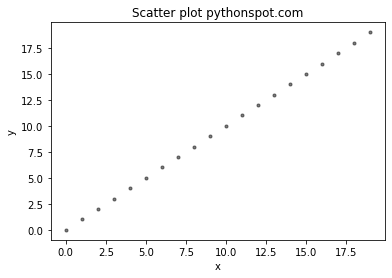

In [45]:
# Create data
N = 500
x = list(range(20))
y = list(range(20))
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
print(len(x))

20


In [44]:
print(len(y))

TypeError: object of type 'int' has no len()